# **Milestone 1**

### **Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?


### **The key questions:**

- What are the key questions that need to be answered?

    - Are there particular attributes of a car that can lead to a particular price point?
    - Do certain car models or brands really sell differently when they are used or are they all priced similarly?
    - What is a price that our sellers can offer to the customer that will maximize our profits but also maximize the utility of the customer?

### **The problem formulation**:

- What is it that we are trying to solve using data science?


## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [2]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [3]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights:**

We observe that there are 7253 rows within this data set and 14 variables that we want to consider for this analysis. We can also see that there are a good portion of the New_price variable and Price variable do not have a numerical observatoin. We will have consider alternatives of handling missing values

### **Let us check the data types and and missing values of each column** 

In [5]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights:**
- We observe that mileage has two missing values, engine has 46 missing values, power has 175 missing values, seats has 53 missing values, New_Price has 6,247 missing values, and Price has 1234 missing values. 
- Name, location, Fuel_Type, Trasmission, and Owner_Type are all objects(strings) 
- S.No., Year, Kilometers_Driven are integers 
    - S.No. and Year should be considered objects in my opinion (Strings) or categorical variables
- Mileage, Engine, Power, Seats, New_Price, and Price are Float types
    - Seats should be considered an integer and may need to be changed

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [7]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns = ['S.No.'], inplace = True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [8]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations and Insights:**
- Year appears to have a min of 1996 with a max of 2019  and an median and mean that are close to each other. I dont think year should be an integar, its more of a categorical variable in my opinion
- Kilometers_Driven does not appear to fulfill the central limit theorom with a mean and median that is drastically different caused by the extremely high maximum entry compared and a siginificantly large range as well as a std that is larger than the mean
- Milage appears to flow the central limit therom with an a range around 34 km/liter
- Power does not satisfy the central limit therom with a range of approximately 580 and a mean that is larger than the median. The maximum distance between the 75 percentile is significantly large
- Seats have a range of 8 and a mean and median that are relatively close to one another. There is a significant jump from the 75 percentile to the max making it appear that this distribution is right skewed
- New Price is right skewed with a maximum that is almost 350 INR more than the 75 percentile and a mean and median that are not similar which does not satify the central limit therom

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [9]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object']
data.describe(include='object').T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [10]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].nunique())
    
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


#### **Observations and Insights:**
- There are 2041 unique brand names and model names of cars within this data set
- There are 11 unique locations that these used cars are being sold within this data set
- There are 5 unique fuel types for the cars being used in the data set
- There are 2 unique transmissions for these cars within the data set
- There are 4 unique ownerhship types for this data set as well

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [11]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(by = 'Kilometers_Driven', ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights:**
- Row 2328 has driven their BMW X5 xDrive 30d M Sport 6,500,000 Kilometers. This appears to be a typo and somehting that we do not consider to be possible so we will remove this observation 
- All of these vehicles that have high mileage all have an owner type of first meaning these cars have only had one previous owner
- The top nine observations are 5 seat vehicles
- The top 10 kilometers driven cars are either diesel or petrol cars
- Seven of the 10 highest driven cares are manual cars while the other three are automatic transmissions

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [12]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop([2328], inplace = True)

**Check Mileage extreme values**

In [13]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(by = 'Mileage', ascending = True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [14]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

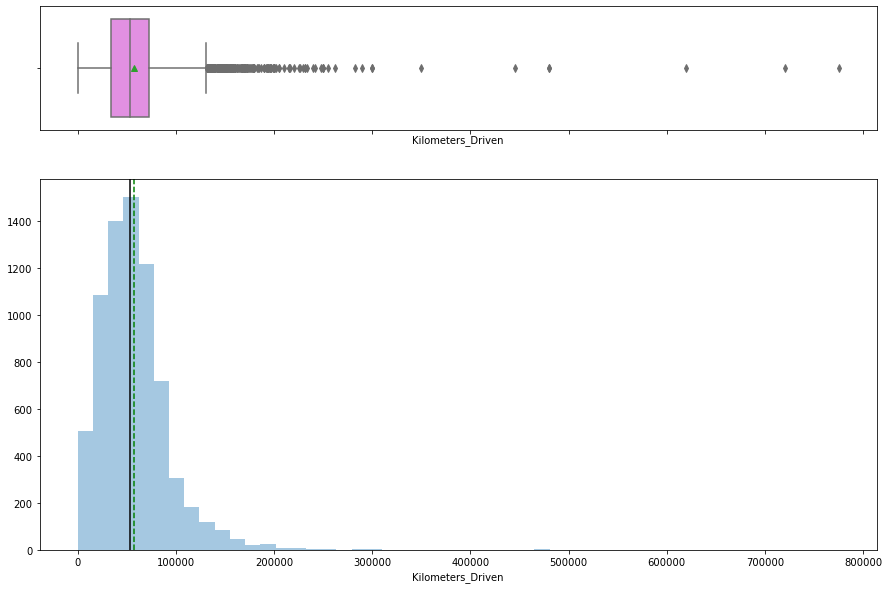

In [15]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

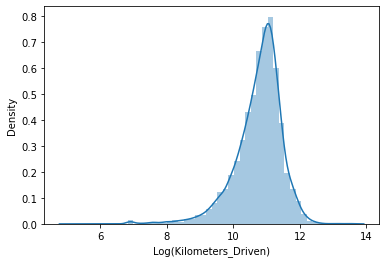

In [16]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights:**

- We can observe that after taking the log of Kilometers driven, that the data's distribution goes from a left-skewed distribution with a long right tail into a more normal distribution with a long left tail

In [17]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

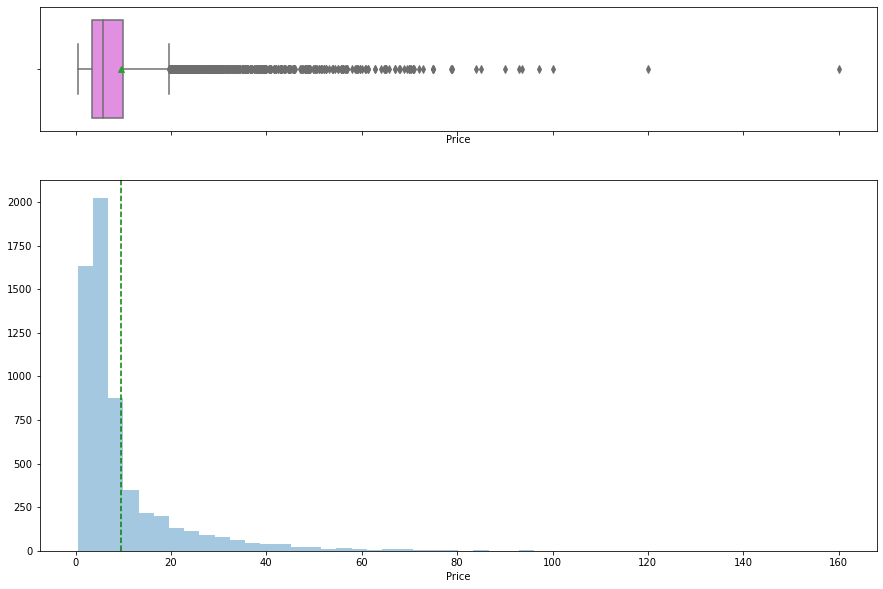

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

<AxesSubplot:xlabel='Log(Price)', ylabel='Density'>

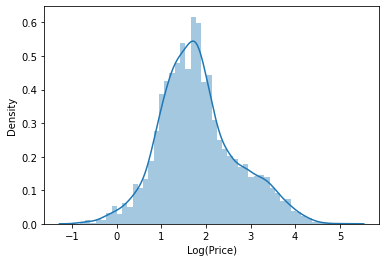

In [19]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data['Price']), axlabel = 'Log(Price)')

In [20]:
# We can Add a transformed Price feature in data
data['Price_log'] = np.log(data['Price'])

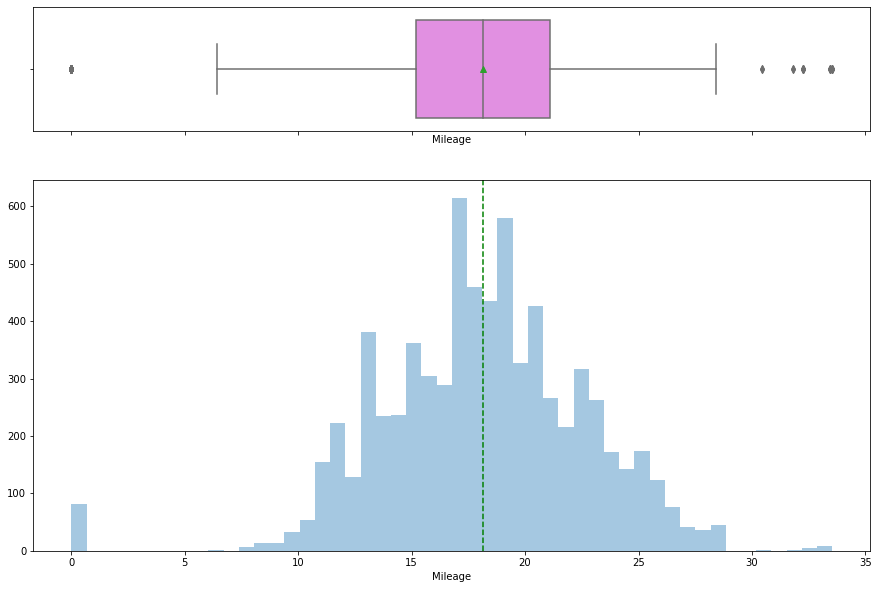

In [21]:
# Plot histogram and box-plot for 'Mileage'
histogram_boxplot(data['Mileage'])

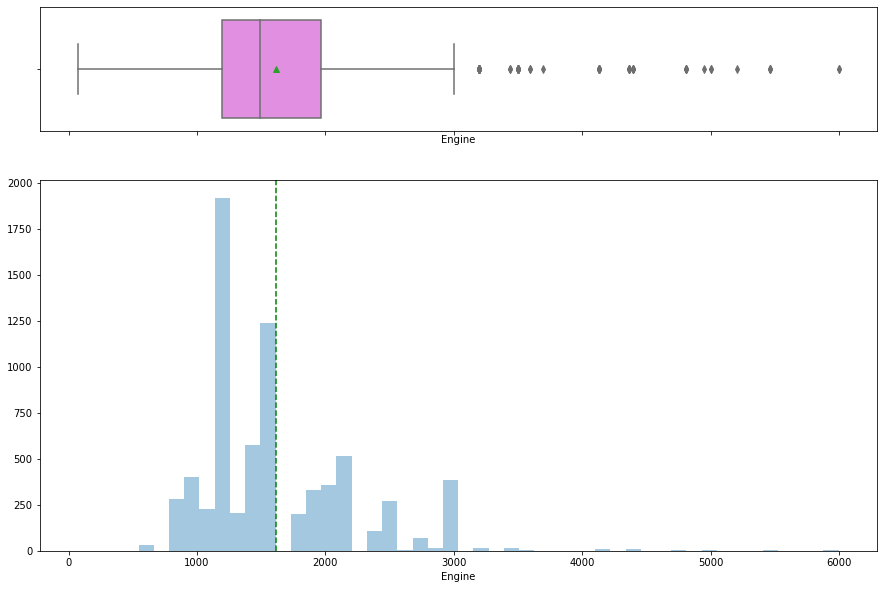

In [22]:
# Plot histogram and box-plot for 'Engine'
histogram_boxplot(data['Engine'])

<AxesSubplot:xlabel='Log(Engine)', ylabel='Density'>

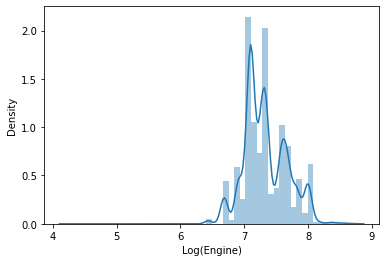

In [23]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data['Engine']), axlabel = 'Log(Engine)')

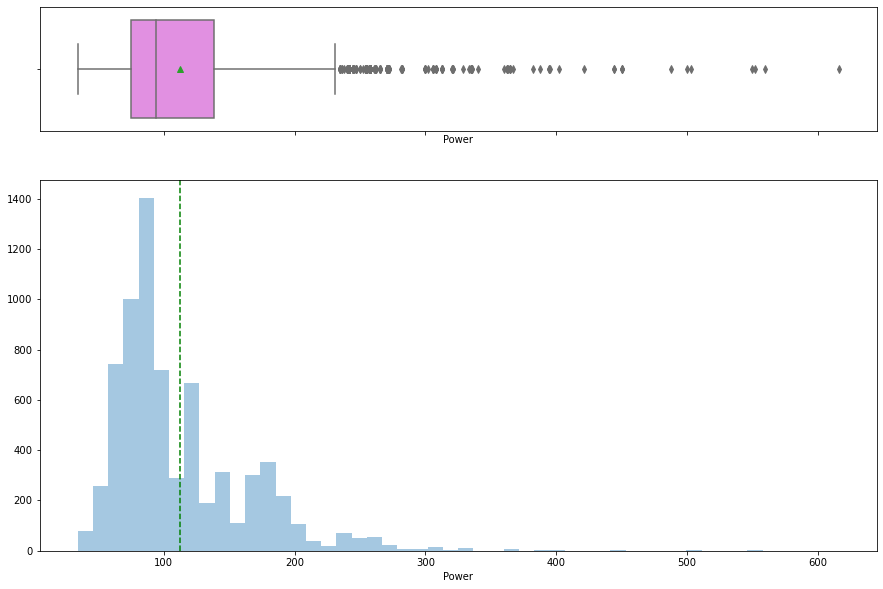

In [24]:
# Plot histogram and box-plot for 'Power'
histogram_boxplot(data['Power'])

<AxesSubplot:xlabel='Log(Power)', ylabel='Density'>

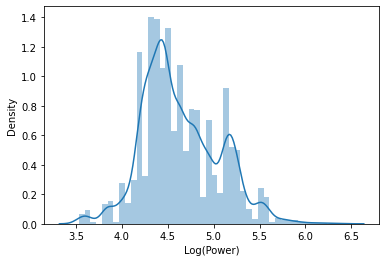

In [25]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data['Power']), axlabel = 'Log(Power)')

In [26]:
# We can Add a transformed Power feature in data
data['Power_log'] = np.log(data['Power'])

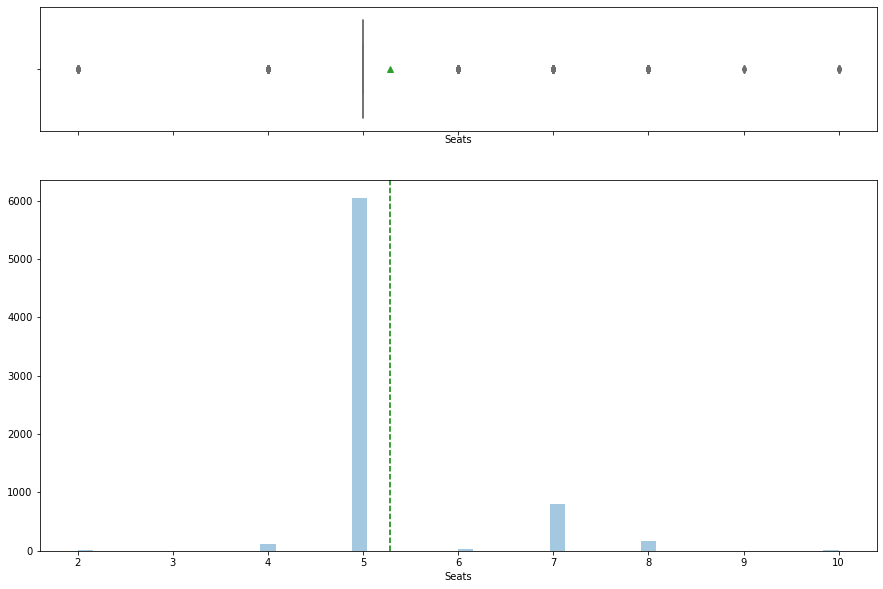

In [27]:
# Plot histogram and box-plot for 'Seats'
histogram_boxplot(data['Seats'])

<AxesSubplot:xlabel='Log(Seats)', ylabel='Density'>

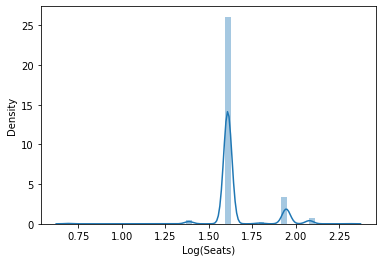

In [28]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data['Seats']), axlabel = 'Log(Seats)')

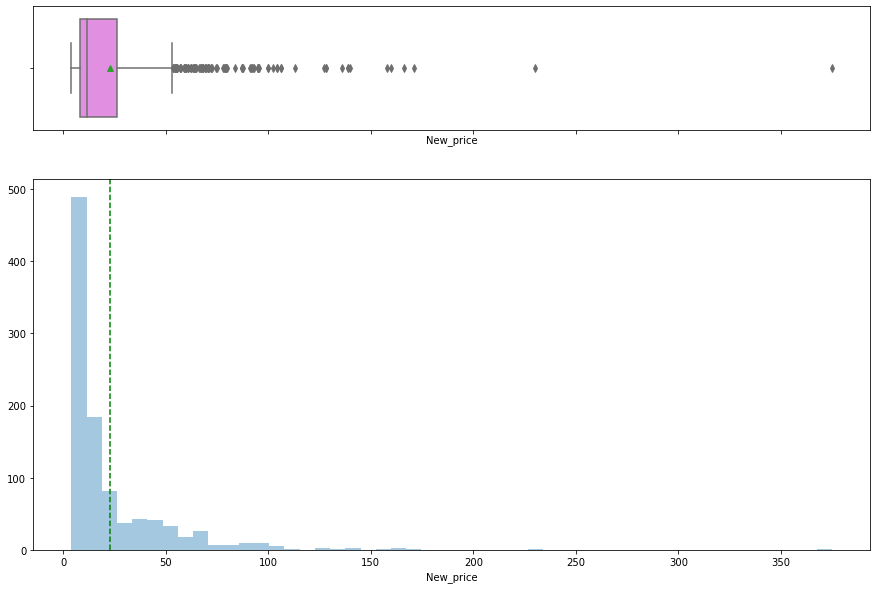

In [29]:
# Plot histogram and box-plot for 'New_price'
histogram_boxplot(data['New_price'])

<AxesSubplot:xlabel='Log(New_Price)', ylabel='Density'>

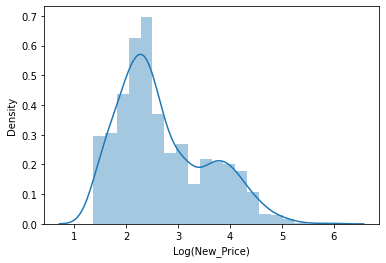

In [30]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data['New_price']), axlabel = 'Log(New_Price)')

In [31]:
# We can Add a transformed Price feature in data
data['New_Price_log'] = np.log(data['New_price'])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

**Observations and Insights for all the plots:**

- After examining all of the potential independent variables, we will take the log of Price, Power, and New Price in order to have these variables have a closer resemblance to a normal distribution since they do appear to have a skewed distribution. All of these variables are continuous and have a wide range that can throw off our error terms and possibly give us false negatives or false positives

## **2. Univariate analysis - Categorical Data**

In [32]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

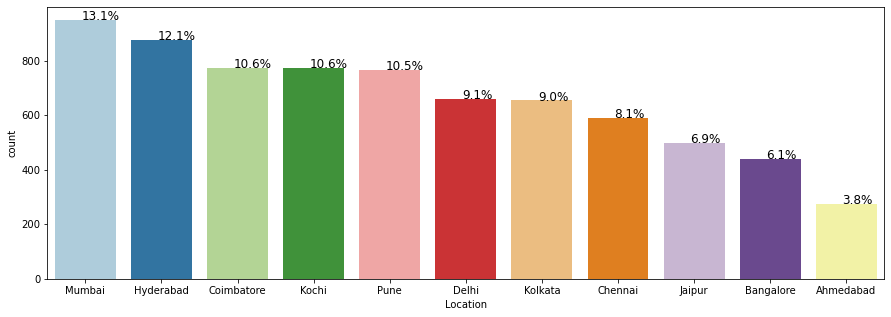

In [33]:
# Bar Plot for 'Location'
perc_on_bar('Location')

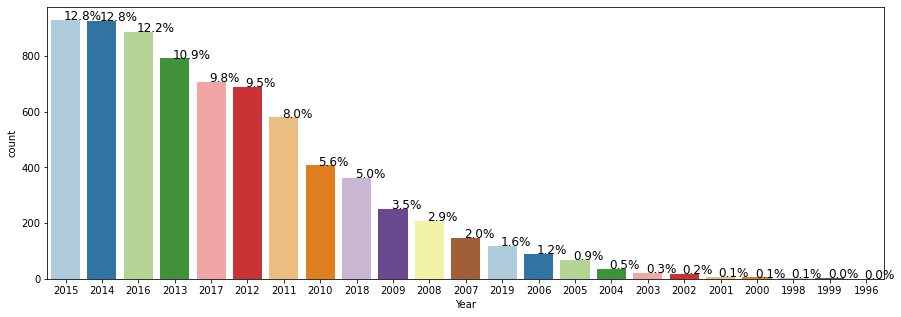

In [34]:
# Bar Plot for 'YEAR'
perc_on_bar('Year')

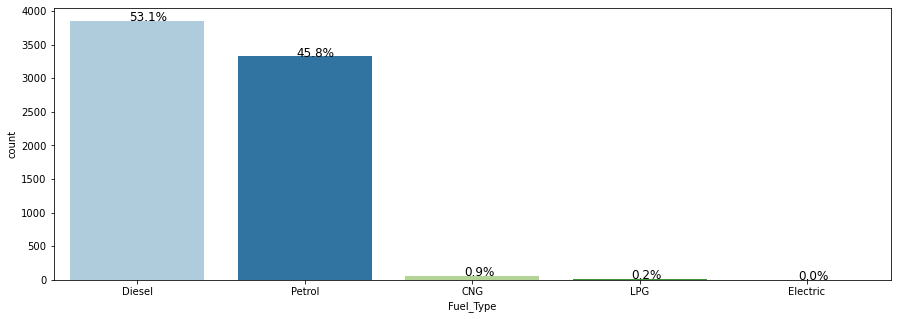

In [35]:
# Bar Plot for 'Fuel_Type'
perc_on_bar('Fuel_Type')

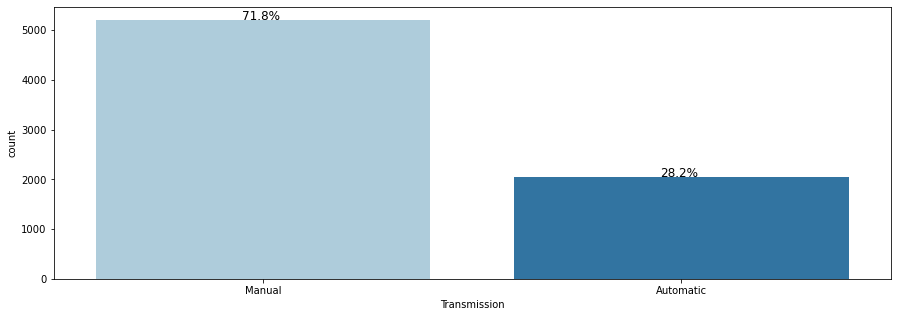

In [36]:
# Bar Plot for 'Transmission'
perc_on_bar('Transmission')

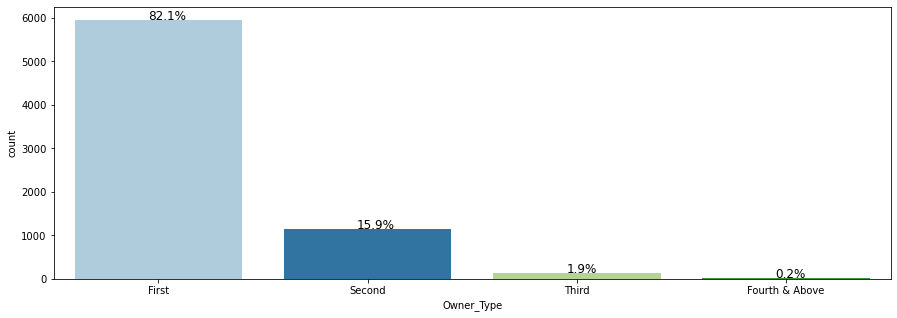

In [37]:
# Bar Plot for 'Owner_Type'
perc_on_bar('Owner_Type')

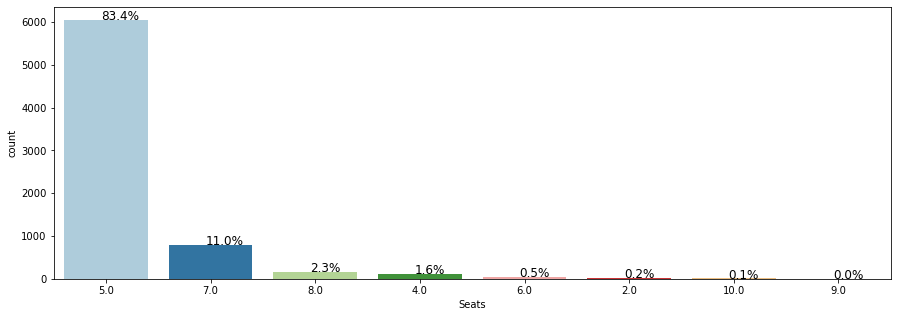

In [38]:
# Bar Plot for 'Seats'
perc_on_bar('Seats')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

**Observations and Insights from all plots:**
- We observe that Mumbai (13.1%) has the most cars sold or avaiable to purhcase within this data set followed by Hyderabad(12.1%), Coimbatore(10.6%), Kochi(10.6%), and Pune (10.5%). This corresponds the approximately 55% of all cars location in this data set
- Roughly 81.6% of all used cars were manufactured between the years 2010 and 2017, meaning that sellers are willing to sell their cars that are at least 5 years or older while significantly older cars than 2010 are not considered for resale as often
- Approximately 98.9% of all cars within this data set are considered to be Diesel or Petrol powered cars while CNG, LPG, and Electric fill the remaining 1.1% with no electric cars being avaiable for resale
- Approximately 72 percent of cars being resold are manual compared to the 28 percent automatic counterparts
- Approximately 82 percent of the cars being sold are from first owners of the vehicles, followed by second owners at approximately 16 percent, third owners at almost 2 percent and the remainder as had four or more owners

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='Price_log'>

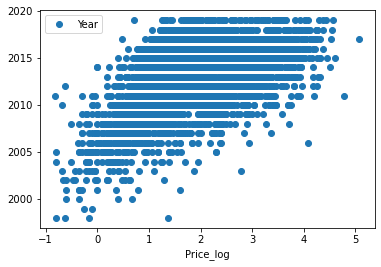

In [39]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'Price_log', y = 'Year', style = 'o')

<AxesSubplot:xlabel='Price_log'>

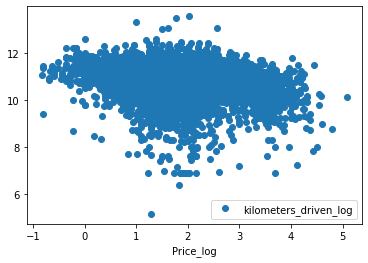

In [40]:
# Let us plot pair plot for the variables 'kilometers_driven_log' and 'price_log'
data.plot(x = 'Price_log', y = 'kilometers_driven_log', style = 'o')

<AxesSubplot:xlabel='Price_log'>

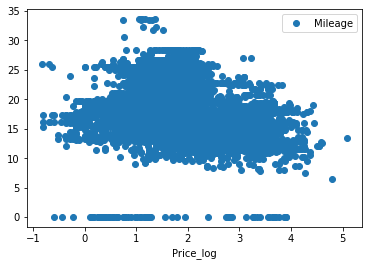

In [41]:
# Let us plot pair plot for the variables 'Mileage' and 'price_log'
data.plot(x = 'Price_log', y = 'Mileage', style = 'o')

<AxesSubplot:xlabel='Price_log'>

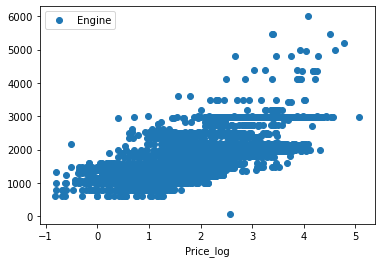

In [42]:
# Let us plot pair plot for the variables 'Engine' and 'price_log'
data.plot(x = 'Price_log', y = 'Engine', style = 'o')

<AxesSubplot:xlabel='Price_log'>

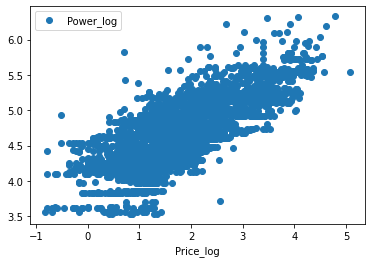

In [43]:
# Let us plot pair plot for the variables 'Power' and 'price_log'
data.plot(x = 'Price_log', y = 'Power_log', style = 'o')

<AxesSubplot:xlabel='Price_log'>

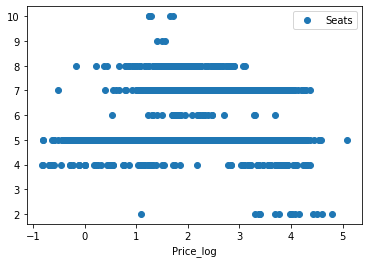

In [44]:
# Let us plot pair plot for the variables 'Seats' and 'New_price'
data.plot(x = 'Price_log', y = 'Seats', style = 'o')

<AxesSubplot:xlabel='Price_log'>

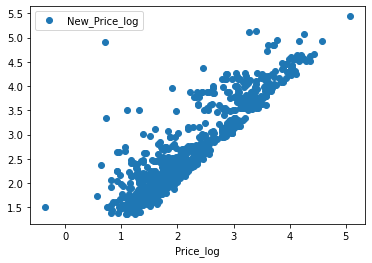

In [45]:
# Let us plot pair plot for the variables 'New_price' and 'New_price'
data.plot(x = 'Price_log', y = 'New_Price_log', style = 'o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

**Observations and Insights from all plots:**

- We appear to have postive relationships between Price_log and New_Price_log, Power_log, Year, and Engine. Engine appears to have the weakest relationship with price and it would make sense that a newer car would be considered to be more money since there has been less done to it
- There is a slight negative relationship between Price_log and Kilometers_Driven_log and Mileage
- There is no relationship for Price_log and the number of seats in a given vehicle


### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

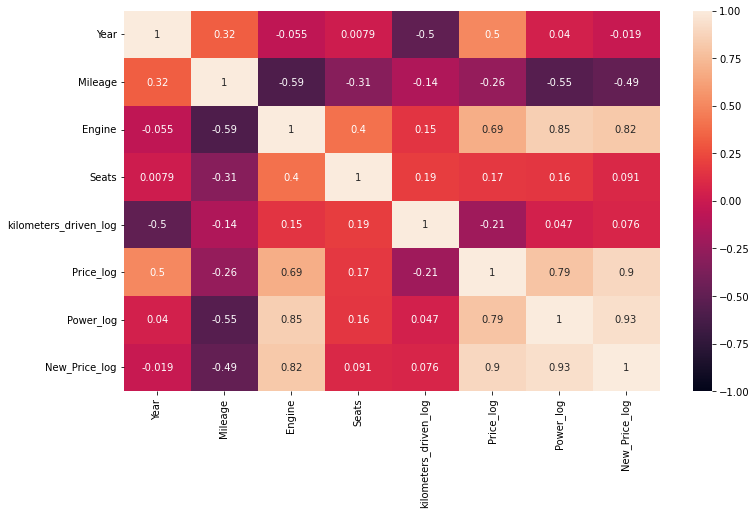

In [46]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Price', 'Kilometers_Driven', 'Power', 'New_price'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights:**
- Price_log has a strong positive correlation with Engine, Power_log and New_Price_log has we described previously with a weak postive correlation with the year in which the car was made
- Engine also has a strong correlation with Power_log, and New_Price_log which could be some concern for multicollinearity but we can make sure to review that with a VIF analysis to make sure we are capturing the true effect of our models independent variables with respect to our dependent variable
- No other variables have a strong relationship, positive or negative, between each other

### **3. Box plot**

In [47]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

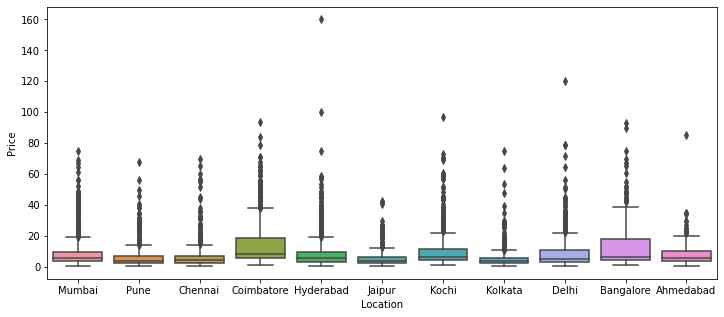

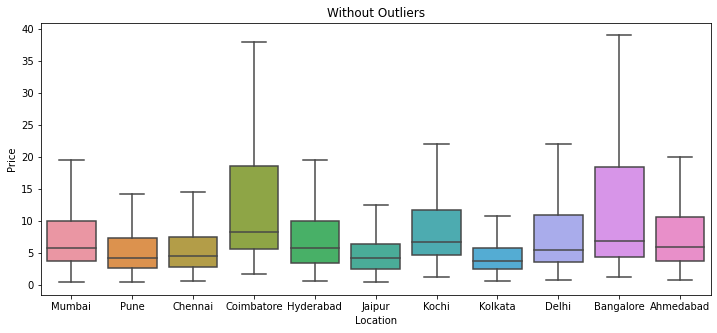

In [48]:
# Box Plot: Price vs Location
boxplot(data['Location'])

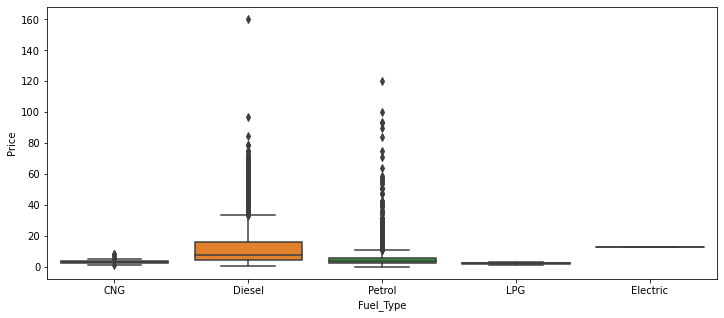

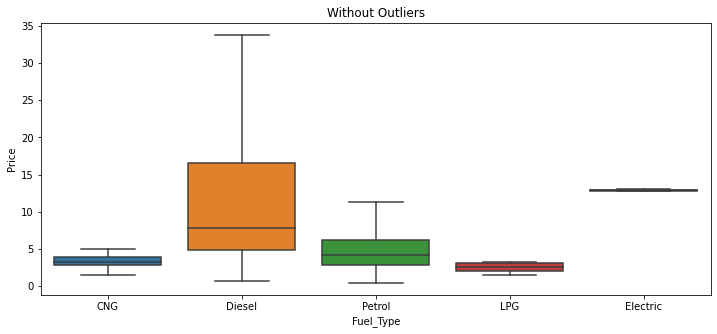

In [49]:
# Box Plot: Price vs Fuel_Type
boxplot(data['Fuel_Type'])

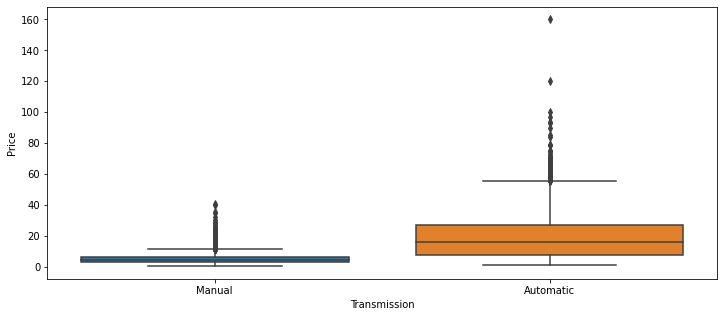

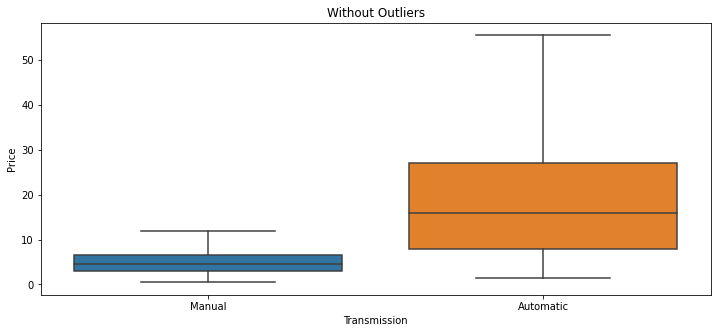

In [50]:
# Box Plot: Price vs Transmission
boxplot(data['Transmission'])

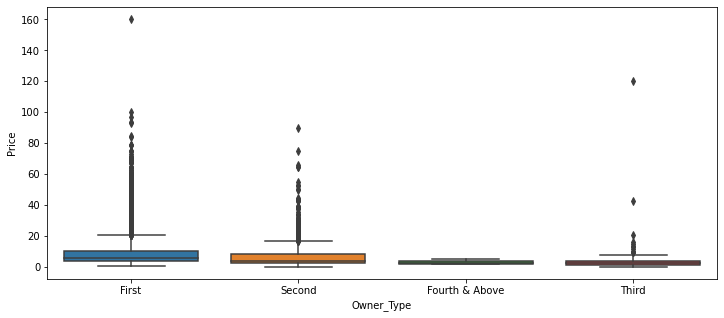

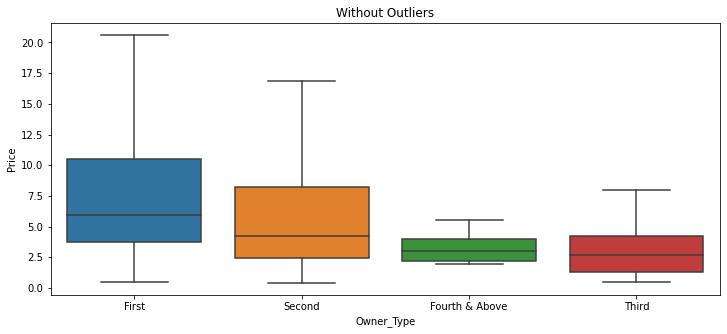

In [51]:
# Box Plot: Price vs Owner_Type
boxplot(data['Owner_Type'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:**
- Price for a car is higher in cities like Bangalore and Coimbatore compared to other cities in the analysis as well as diesel cars being considerably higher on average than other cars within this data set. This point could be misleading since there is a small sample size of used vehicles that are CNG, LPG, and electic
- Automatic transmission cars are considered to be more pricey when we remove the outliers within our data and cars that have fewer previous owners go for a higher premium than those who have had multiple owners

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

In [52]:
#Replacing Car Brand Text 

data.Name = data.Name.replace('Mini Countryman Cooper D', 'Mini Cooper Countryman D')
data.Name = data.Name.replace('ISUZU D-MAX V-Cross 4X4', 'Isuzu D-MAX V-Cross 4X4')
data.Name = data.Name.replace('Mini Clubman Cooper S', 'Mini Cooper Clubman S')
data.Name = data.Name.replace('OpelCorsa 1.4Gsi', 'Opel Corsa 1.4Gsi')

In [53]:
car_brand = ['Hyundai', 'Honda', 'Volkswagen', 'Land Rover', 'Audi', 'Verna', 
             'Maruti', 'Mitsubishi', 'Renault', 'Mercedes-Benz', 'BMW',
            'Toyota', 'Mahindra', 'Tata', 'Ford', 'Chevrolet', 'Datsun', 
            'Skoda', 'Jeep', 'Nissan', 'Acura', 'Alfa Romeo', 'Buick', 'Dodge',
            'Fiat', 'GMC', 'Lexus', 'Lincoln', 'Mazda', 'Pontiac', 'Porsche',
            'Jaguar', 'Volvo', 'Mini Cooper', 'Smart', 'Ambassador', 'Isuzu', 
            'Bentley', 'Hindustan', 'Lamborghini', 'Force One', 'Opel']
pat=r'({})'.format('|'.join(car_brand))

In [54]:
data['car_brand']=data.Name.str.extract(pat)
data['car_model']=data.pop('Name').str.replace(pat,'').str.strip()

In [55]:
data.car_brand.isna().sum()

0

In [56]:
data.car_model.isna().sum()

0

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               7252 non-null   object 
 1   Year                   7252 non-null   int64  
 2   Kilometers_Driven      7252 non-null   int64  
 3   Fuel_Type              7252 non-null   object 
 4   Transmission           7252 non-null   object 
 5   Owner_Type             7252 non-null   object 
 6   Mileage                7250 non-null   float64
 7   Engine                 7206 non-null   float64
 8   Power                  7077 non-null   float64
 9   Seats                  7199 non-null   float64
 10  New_price              1006 non-null   float64
 11  Price                  6018 non-null   float64
 12  kilometers_driven_log  7252 non-null   float64
 13  Price_log              6018 non-null   float64
 14  Power_log              7077 non-null   float64
 15  New_

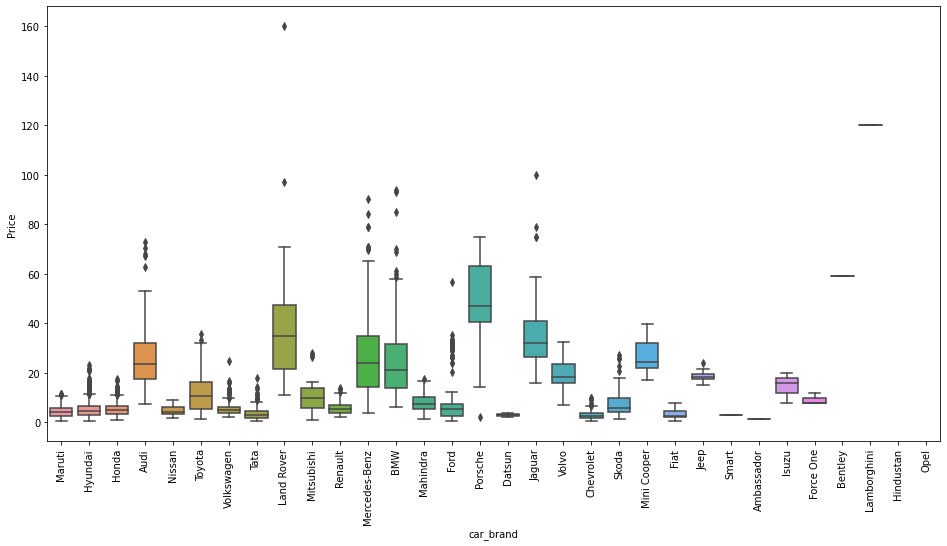

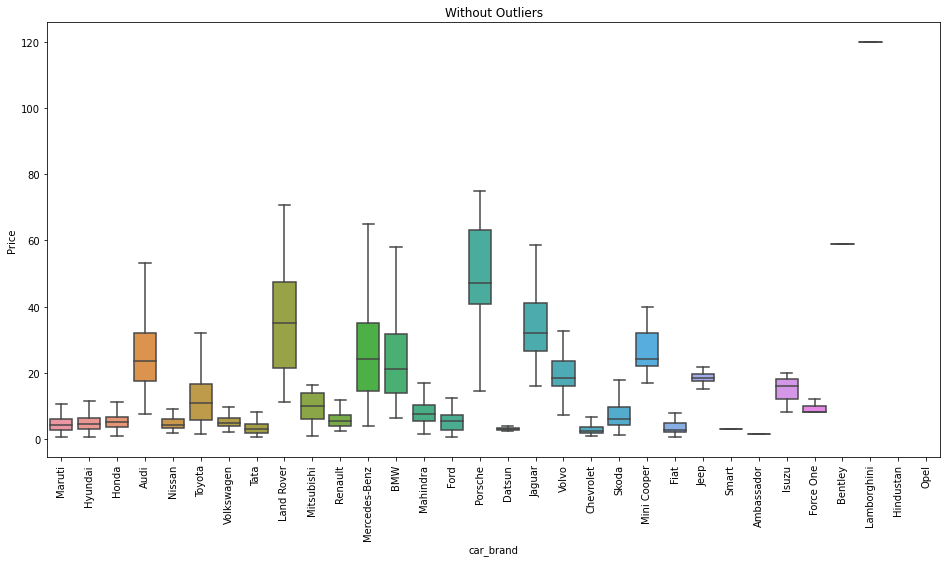

In [58]:
plt.figure(figsize = (16, 8)) # Setting size of boxplot
    
sns.boxplot(x = data['car_brand'], y = data['Price']) # Defining x and y

plt.xticks(rotation = 90)

plt.show()    

plt.figure(figsize = (16, 8))
    
plt.title('Without Outliers')
    
sns.boxplot(x = data['car_brand'], y = data['Price'], showfliers = False) # Turning off the outliers

plt.xticks(rotation = 90)

plt.show()

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

#### **Observations and Insights:**
- Out of 7253 total entries we are missing a total of 141 entries that are not broken out by car brand. It appears that Land Rovers, Mercedes-Benz, BMWs, and Audis have the highest price in the used car market. This would make sense because certain cars are considered to "hold their value" long after their first purchase
- We can also that Toyota and Jeep have a strong price point compared to all other car brands but do not hold their value as well as the previous. This can also be misleading because cars like Audi, Land Rover, MB, and BMW sell for a higher initial cost than Toyotas and Jeeps, so it would make sense that they have a higher resale value on the service than a Jeep or Toyota. 
- If someone were to want to sell their car, these cars would cost the most and buyers would have to pay a premium for those vehicles

### **Missing value treatment**

In [59]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Power_log                 175
New_Price_log            6246
car_brand                   0
car_model                   0
dtype: int64

#### **Observations and Insights:**

- We can observe that all of the entries for years, kilometers driven, fuel type, transmission, and owner type are provided for all entries. 
- We have a high amount of observations missing with a new price but this would make sense being that we have a large range of cars that are no longer being made within that given time frame so it makes sense that their isnt a new price available while Price takes up the remaining amount of cars. The sum of the distributino of new price and price are equal to 1
- 2 cars are missing their mileage, 46 are missing their engine metric, 175 are missing how much power is inside of the vehicle, 53 data points do not have a number of seats that are within the given car, and 141 car brands are unknown at this point

**Missing values in Seats**

In [60]:
# Checking missing values in the column 'Seats'
data.Seats.isnull().sum()

53

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [61]:
# Impute missing values in Seats,you can use fillna method in pandas
data['Seats'] = data['Seats'].fillna(data.groupby(['car_brand', 'car_model'])['Seats'].transform('median'))

In [62]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data['Seats'].isnull().sum()

46

**Missing values for Mileage**

In [63]:
# Now check missing values of each column. Hint: Use isnull() method
data['Mileage'].isnull().sum()

2

In [64]:
# Impute missing Mileage. For example, use can use median or any other methods.
data['Mileage'] = data['Mileage'].fillna(data.groupby(['car_brand', 'car_model'])['Mileage'].transform('median'))

In [65]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data['Mileage'].isnull().sum()

2

**Missing values for Engine**

In [66]:
# Now check missing values of each column. Hint: Use isnull() method
data['Engine'].isnull().sum()

46

In [67]:
# Impute missing Engine. For example, use can use median or any other methods.
data['Engine'] = data['Engine'].fillna(data.groupby(['car_brand', 'car_model'])['Engine'].transform('median'))

In [68]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data['Engine'].isnull().sum()

40

**Missing values for Power**

In [69]:
# Now check missing values of each column. Hint: Use isnull() method
data['Power_log'].isnull().sum()

175

In [70]:
# Impute missing Power. For example, use can use median or any other methods.
data['Power_log'] = data['Power_log'].fillna(data.groupby(['car_brand', 'car_model'])['Power_log'].transform('median'))

In [71]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data['Power_log'].isnull().sum()

136

**Missing values for New_price**

In [72]:
# Now check missing values of each column. Hint: Use isnull() method
data['New_Price_log'].isnull().sum()

6246

In [73]:
# Impute missing New_price. For example, use can use median or any other methods.
data['New_Price_log'] = data['New_Price_log'].fillna(data.groupby(['car_brand', 'car_model'])['New_Price_log'].transform('median'))

In [74]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data['New_Price_log'].isnull().sum()

6019

In [75]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     40
Power                     175
Seats                      46
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Power_log                 136
New_Price_log            6019
car_brand                   0
car_model                   0
dtype: int64

**Observations for missing values after imputing:**
- After implementing our fillna method coupled with a groupby and transformation call that replaces a NaN with the median measurement of a given car model and car brand for a given variable, we can observe the following:
    - We know 7 more observations for seats 
    - Gain no new observations for Mileage and remain at 2 missing values
    - Gain 6 more observations that pertain to Engines with 40 missing values
    - Gain 39 more observations for the Log of Power with 136 missing values
    - Gain 225 more observations for the Log of New Price for a given vehicle with 6,019 observations still missing

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

### **Saving the Data**

Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

To save the pre-processed data frame, please follow the below lines of code:

In [76]:
# Assume df_cleaned is the pre-processed data frame in your code, then
data.to_csv("cars_data_updated.csv", index = False)

The above code helps to save the cleaned/pre-processed dataset into csv file, that can be further loaded into Milestone2.

# **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

**Note:** Please load the data frame that was saved in Milestone 1 here before separating the data, and then proceed to the next step in Milestone 2.

### **Load the data**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

In [2]:
#Loading Data in from Milestone 1
cars_data = pd.read_csv("cars_data_updated.csv")

In [3]:
# Filling in all infinite and NaN values with the median value of numerical values
cars_data.replace([np.inf, -np.inf], np.nan, inplace=True)
cars_data.fillna(cars_data.mean(numeric_only = True), inplace=True)
cars_data = cars_data.reset_index()

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [4]:
# Step-1
X = cars_data[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'car_brand', 'car_model']]

y = cars_data[["Price_log", "Price"]]

In [5]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [6]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5076, 2093) (2176, 2093) (5076, 2) (2176, 2)


In [7]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [8]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [9]:
# Create a linear regression model
lr = LinearRegression()

In [10]:
# Fit linear regression model
lr.fit(X_train, y_train['Price_log']) 

LinearRegression()

In [11]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.8737792927005015
R-square on test set :  0.5426574836333649
RMSE on training set :  3.606010208408673
RMSE on test set :  6.9111026225093335


**Observations from results:**
* We observe a strong R-Squared measurement from our training data set that is significantly better than our test set, however, I believe that this measurement is misleading due to the fact that we have a significant amount of variables in our regression model. I would not consider our model to be accurate solely on R-Squared
* Additionally, we can observe that our RMSE of our test data is more than double the RMSE of our training set, causing us to determine that this linear regression model is not a good model and further exploration is needed

**Important variables of Linear Regression**

Building a model using statsmodels.

In [12]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     13.79
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:43:39   Log-Likelihood:                -660.79
No. Observations:                5076   AIC:                             4836.
Df Residuals:                    3319   BIC:                         1.631e+04
Df Model:                        1756                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [14]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [15]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
car_model_Jetta 2012-2014 2.0L TDI Highline,-1.250567e-10,4.970611e-02
car_model_Amaze S i-DTEC,-9.053100e-01,4.957938e-02
car_model_BRV i-DTEC V MT,-9.004755e-01,4.956999e-02
car_model_Santro Xing XG,1.800365e-10,4.953024e-02
car_brand_Opel,6.137760e-10,4.944529e-02
...,...,...
car_model_Alto K10 LXI CNG,-7.048492e+00,3.399064e-61
Fuel_Type_LPG,-6.282439e+00,1.851807e-65
const,-1.540587e+02,5.488220e-68
car_model_Wagon R LXI CNG,-7.404767e+00,2.080451e-80


In [16]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['car_brand', 'car_model', 'Transmission', 'Location', 'Fuel_Type', 'Kilometers_Driven', 'Owner_Type', 'Year']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [17]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [18]:
# Create a Ridge regression model
ridgereg = Ridge()

In [19]:
# Fit Ridge regression model
ridgereg.fit(X_train, y_train['Price_log'])

Ridge()

In [20]:
# Get score of the model
Ridge_score = get_model_score(ridgereg)

R-sqaure on training set :  0.8427551996023332
R-square on test set :  0.7194039323861161
RMSE on training set :  4.024850874642717
RMSE on test set :  5.413365409069641


In [21]:
lassoreg = Lasso()

In [27]:
lassoreg.fit(X_train, y_train['Price_log'])

Lasso()

In [28]:
Lasso_score = get_model_score(lassoreg)

R-sqaure on training set :  -1.9443539206427758
R-square on test set :  -0.4488355443313652
RMSE on training set :  17.41633033223061
RMSE on test set :  12.30087766410895


**Observations from results:**
* Ridge
    * From our Ridge Regression we can observe that R-squared for the training set decreased opposed to the linear regression due to the penalization of multicollinearity that a Ridge Regression applies. We also observe that our training set R-square is decreases as our test R-square is increasing. This shows that there is still some knoweledge gained but now we must confirm that we arent overfitting with RMSE.
    * RMSE for our Ridge model converged a little but we still observe our test and training RMSE to not be similar which is a cause for concern of underfitting
* Lasso
    * Our Lasso Regression model is not considered to be a good model with R-Squared being negative our training data and the test set have very little to no explanation of the variation in our data. Our RMSE for our training and test data are not considered to be eqaul so our training data does not accurately describe out test set. Which indicates a significant overfitting issue

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [23]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [24]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(max_depth = 5, random_state = 1)

In [25]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(max_depth=5, random_state=1)

In [26]:
# Get score of the model
Dtree_Score = get_model_score(dtree)

R-sqaure on training set :  0.6334673344380588
R-square on test set :  0.6082787792942481
RMSE on training set :  6.144944852988926
RMSE on test set :  6.396097906074708


**Observations from results:**
* R-Squared and RMSE of both the training and test sets appear to be similar causing us to believe that this is considered to be the best model so far with minor underfitting present

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [27]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], 
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(20))

                                               Imp
Power                                     0.690752
Year                                      0.243519
Engine                                    0.042318
Transmission_Manual                       0.005773
Mileage                                   0.005272
car_brand_Honda                           0.004571
car_model_Cayenne Base                    0.003567
Owner_Type_Fourth & Above                 0.002483
car_model_New Safari DICOR 2.2 VX 4x2     0.001746
car_model_Q7 35 TDI Quattro Technology    0.000000
car_model_Q7 3.0 TDI Quattro Technology   0.000000
car_model_Q7 3.0 TDI quattro              0.000000
car_model_Q7 35 TDI Quattro Premium Plus  0.000000
car_model_Q7 4.2 FSI quattro              0.000000
car_model_Q5 30 TDI quattro Premium Plus  0.000000
car_model_Q7 4.2 TDI Quattro Technology   0.000000
car_model_Q7 45 TDI Quattro Premium Plus  0.000000
car_model_Q7 45 TDI Quattro Technology    0.000000
car_model_Qualis FS B2         

**Observations and insights:**
* We observe that the logrithmic transformation of Power, the year of the vehicle, the engine size, mileage of the vehicles, and the car brand of the vehicle are considered to be the 5 segmentation points for our decision tree
* We assume that the log of power and power are considered to be correlated due since one is a transformation of the other, so we would not consider power to be a significant variable over log of power
* We ended up on max depth of 5 so that we could maximize the overall R-square will reducing the difference between test and train RMSE. There was a larget jump in RMSE when going from 5 to 6 max depth

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [28]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [29]:
# Create a Randomforest regression model 
RandForestReg = RandomForestRegressor(max_depth = 4, random_state = 1)

In [30]:
# Fit Randomforest regression model
RandForestReg.fit(X_train, y_train['Price_log'])

RandomForestRegressor(max_depth=4, random_state=1)

In [31]:
# Get score of the model
RandForestScore = get_model_score(RandForestReg)

R-sqaure on training set :  0.6136562450281239
R-square on test set :  0.5792223755758799
RMSE on training set :  6.308826665478507
RMSE on test set :  6.62907407606471


**Observations and insights:**
* It appears that the random forest, like the decision tree has a better overall model compared to our linear regression models. These models explain more variation with a r-square that is slightly higher than our test set but also a RMSE that is minimized compared to going down or up one more within our max depth of the random forset, meaning that there is a little bit of information gain from this model with minimal underfitting

**Feature Importance**

In [32]:
# Print important features similar to decision trees
print(pd.DataFrame(RandForestReg.feature_importances_, columns = ["Imp"], 
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(20))

                                                         Imp
Power                                               0.717975
Year                                                0.233589
Engine                                              0.036359
car_brand_Honda                                     0.002813
Kilometers_Driven                                   0.001819
car_model_Cayenne Base                              0.001277
car_brand_Land Rover                                0.001128
Transmission_Manual                                 0.001062
Mileage                                             0.001034
Fuel_Type_Diesel                                    0.000708
car_brand_Mahindra                                  0.000539
car_model_New Safari DICOR 2.2 VX 4x2               0.000341
car_brand_Skoda                                     0.000216
car_brand_Mercedes-Benz                             0.000179
car_model_SLC 43 AMG                                0.000148
car_model_X5 xDrive 30d 

**Observations and insights:**
* We observe that log of power, year, engine size, car brand, car model, and mileage are considered to be the most significant variables for our random forest model
* After looking through this and other models, we are observing that power, year, engine, car brand, are car model are appearing to be important variables when trying to predict price

### **Hyperparameter Tuning: Decision Tree**

In [33]:
# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {
    'max_depth': np.arange(2, 20), 
    'min_samples_leaf': [5, 10, 20, 30, 40]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train['Price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(max_depth=7, min_samples_leaf=20, random_state=1)

In [34]:
# Get score of the dtree_tuned
Dtree_Tuned_Score = get_model_score(dtree_tuned)

R-sqaure on training set :  0.6946359961536503
R-square on test set :  0.5973763697108214
RMSE on training set :  5.608807925324634
RMSE on test set :  6.484495355411322


**Observations and insights:**
* After tuning our model, we observe that the optimal max depth of our decision tree should be at 7 depth , with a minimum sample of 20
* R-square improves while the difference between the test and train RMSE appears to diverge from each other, meaning the underfitting is increasing causing some level of concern for predicting the correct price of a used car

**Feature Importance**

In [35]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], 
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(20))

                                                Imp
Power                                      0.671689
Year                                       0.249266
Engine                                     0.044180
Mileage                                    0.010812
Kilometers_Driven                          0.009723
Transmission_Manual                        0.005504
Fuel_Type_Diesel                           0.002918
car_brand_Mahindra                         0.002146
Location_Kolkata                           0.002064
car_brand_Tata                             0.000793
Fuel_Type_Petrol                           0.000450
car_brand_Toyota                           0.000268
car_brand_Honda                            0.000188
car_model_Qualis FS B2                     0.000000
car_model_Q7 45 TDI Quattro Technology     0.000000
car_model_Q7 45 TDI Quattro Premium Plus   0.000000
car_model_Q7 3.0 TDI Quattro Premium Plus  0.000000
car_model_Qualis FS B3                     0.000000
car_model_Q7

**Observations and insights:**
* Power, year, engine, mileage, and kilometers driven appear to be the most important variables when it comes to predicting price of a used car for a decision tree model. Car brand and model appear to add more insight to the value of a car but not as important as the aforementioned variables

### **Hyperparameter Tuning: Random Forest**

In [36]:
# Choose the type of estimator 
randforest_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parameters that the model takes and play with those
randforest_parameters = { 
    "n_estimators": [30, 40, 50],
    "min_samples_leaf": np.arange(20, 40, 5),
    "max_depth": [10,11,12,13,14,15]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(randforest_tuned, randforest_parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train['Price_log'])

# Set the model to the best combination of parameters
randforest_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
randforest_tuned.fit(X_train, y_train['Price_log'])

RandomForestRegressor(max_depth=14, min_samples_leaf=20, n_estimators=50,
                      random_state=1)

In [37]:
# Get score of the model
RandForest_Tuned_Score = get_model_score(randforest_tuned)

R-sqaure on training set :  0.6894742690772923
R-square on test set :  0.6466711624490327
RMSE on training set :  5.656013579165816
RMSE on test set :  6.074577757718477


**Observations and insights:**
* Maximum depth of our random forest is similar to our decision tree with a max depth of 14. However, we observe that the minimum sample leaf is 20, meaning that we only need 20 observations to make a decision. 
* We also need approximately 50 models (trees) for us to make a optimal model
* we can explain approximately 69 percent of the variance explained in price and have a lower underfitting present compared to our other models

**Feature Importance**

In [38]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(randforest_tuned.feature_importances_, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(20))

                              Imp
Power                    0.666017
Year                     0.240308
Engine                   0.045536
Kilometers_Driven        0.015763
Mileage                  0.013387
Transmission_Manual      0.005417
Location_Kolkata         0.001781
car_brand_Honda          0.001759
Fuel_Type_Diesel         0.001474
Fuel_Type_Petrol         0.001215
car_brand_Mahindra       0.001166
car_brand_Mercedes-Benz  0.000865
car_brand_Maruti         0.000805
car_brand_Hyundai        0.000644
Owner_Type_Second        0.000576
car_brand_Tata           0.000552
car_brand_Toyota         0.000542
Location_Hyderabad       0.000539
Location_Coimbatore      0.000473
Location_Jaipur          0.000293


**Observations and insights:**
* We observe that power, year, egnine size, mileage, kilometers driven, transmission, fuel type, location, and car brand are the most important variables to consider for a random forest. I think this model is considered to be the best when it comes to a machine learning algorithm due to R-squared being the highest while having a RMSE of the training data being similar ot our test data. 

In [39]:
# Defining list of models you have trained
models = [lr, ridgereg, lassoreg, dtree_tuned, randforest_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [40]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression', 'Ridge Regression',
                                          'Lasso Regression', 'Decision Tree',
                                          'Random Forest'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test
                                }) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.873779,0.542657,3.606010,6.911103
1,Ridge Regression,0.842755,0.719404,4.024851,5.413365
2,Lasso Regression,-1.944354,-0.448836,17.416330,12.300878
3,Decision Tree,0.694636,0.597376,5.608808,6.484495
4,Random Forest,0.689474,0.646671,5.656014,6.074578


**Observations:**
* We observe that the overall best model is the Random Forest Model. It does not explain the most variance of price compared to all of the models presented but it does have the smallest difference in Root Mean Square Error of the Testing and Training set. This gives us a good feeling that while it is slightly underfitted, the bias-variance tradeoff would be minimal. Decision Trees would be considered the second best model but with a difference between testing RMSE and training RMSE being slightly larger than the random forest  

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

### **Insights**

**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
    - The most meaningful insight from the data would be that the power, year of the car, engine size, mileage, and car brand are the most telling variable that explain the price of a used car. There are numerous other variables that explain the price of a used car but these are the most impactful variables when predicting a price of a used car

**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
    - From my perspective, the lasso regression model performed the worst due to a harsh overfitting issue when it comes to the RMSE with no knowledge gain from an R-Square perspective. OLS and Ridge Regression are an improvement from the Lasso but a significant underfitting issue is present from the RMSE difference betweent the testing and training set makes it hard to say these two models are passable as a valid model. Decision Tree and Random Forest I would say are the two best models in my opinion.
    - To improve all of the models present in this analysis, I believe that if we disregarded variables that are not good at predicting price the of a used card such as Owner Type, Seats, and new price should be removed from our data set so that we can determine a more accurate prediction on price. In previous models, we included these variables and after removing them from our models, the models did improve slightly and change the overall importance of other variables.

**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?
     - I think that a Random Forest, while having the lower R-square between Random Forest and Decision Trees, has a smaller difference in RMSE of its test and training set. I think that having this is very important because we can minimize the overall bias-variance tradeoff that needs to take place, which will give the most accurate predictions. Decision Trees would be considered the second best model but with the bias-variance tradeoff being slightly higher than the random forest model, I think it would have a strong contendership for those who need a faster run time from a computational perspective compared to Random Forest models. 
     - If you have the resources and the time and resources, I would choose a random forest model to have a better prediction while minimizing errors but I think Decision Trees given a better opportunity to fast problem solving with slightly less accurate measurements. Since we do have time, Random Forest would be my pick for which model to implement and make predictions